Import initial libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

%matplotlib inline

Loading the three different csv files i.e. '2015.csv','2016.csv' and '2017.csv'.

In [3]:
data1= pd.read_csv('2015.csv')
data2= pd.read_csv('2016.csv')
data3= pd.read_csv('2017.csv')
data3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Dropping the un-necessary and uncommon features from all the 3 datasets to be able to concatenate it row-wise.

In [4]:
features1 = data1.drop(['Country','Region','Standard Error','Happiness Score','Happiness Rank'],axis = 1)
features2 = data2.drop(['Country','Region','Lower Confidence Interval','Upper Confidence Interval','Happiness Score','Happiness Rank'], axis = 1)
features3 = data3.drop(['Country','Whisker.high','Whisker.low','Happiness.Score','Happiness.Rank'],axis = 1)

In [5]:
features3.head()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Creating three different targets from the three different datasets.

In [6]:
target1=data1['Happiness Score']
target2=data2['Happiness Score']
target3=data3['Happiness.Score']

In [7]:
features1.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
features3.head()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [9]:
features3.keys()

Index(['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

renaming all the keys of features3 to match the keys of the remaining two features,i.e. features1 and features2.

In [10]:
features3 = features3.rename(index=str, columns=
{
    "Happiness.Score": "Happiness Score",
    'Economy..GDP.per.Capita.': "Economy (GDP per Capita)",
    "Health..Life.Expectancy.": "Health (Life Expectancy)",
    "Trust..Government.Corruption.": "Trust (Government Corruption)",
    "Dystopia.Residual": "Dystopia Residual"
    
})

In [11]:
features3.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
features3.keys()

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

As there are three different targets,we have to concatenate all of them into one single final target.
Similarly for all the features and after the concatenation put the features and target in individual dataframes.

In [13]:
target=np.concatenate((target1, target2, target3),axis=0)
features=np.concatenate((features1,features2,features3),axis=0)
target = pd.DataFrame(target, columns=['Target'])
target.head()
features = pd.DataFrame(features, columns = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'])
features.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
# t = target.reshape(-1,1)

here we are concatenating the features and the final target along axis=1,i.e. all of them become seperate columns.

In [15]:
ds=pd.concat([features,target], axis = 1)

In [16]:
ds.shape

(470, 8)

Data Visualization.

In [17]:
x=features['Economy (GDP per Capita)']
y=ds.Target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

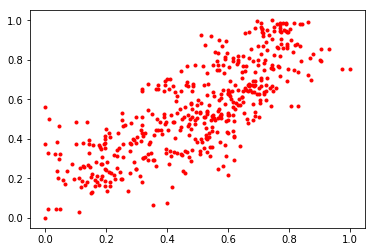

In [18]:
plt.plot(x,y,'r.')

In [19]:
x=features['Family']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

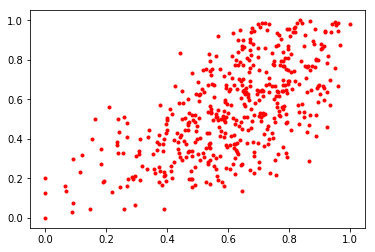

In [20]:
plt.plot(x,y,'r.')

In [21]:
x=features['Health (Life Expectancy)']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

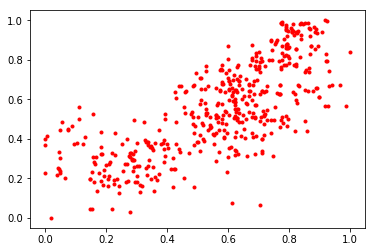

In [22]:
plt.plot(x,y,'r.')

In [23]:
x=features['Freedom']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

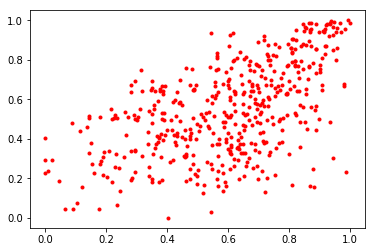

In [24]:
plt.plot(x,y,'r.')

In [25]:
x=features['Trust (Government Corruption)']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

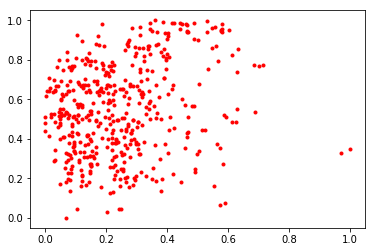

In [26]:
plt.plot(x,y,'r.')

In [27]:
x=features['Generosity']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

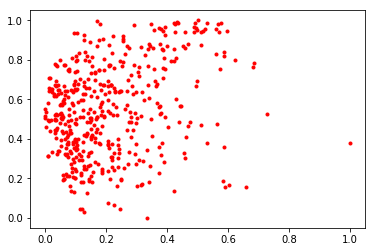

In [28]:
plt.plot(x,y,'r.')

In [29]:
x=features['Dystopia Residual']
y=target
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

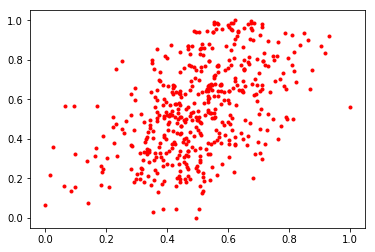

In [30]:
plt.plot(x,y,'r.')

From the above data visualization we can see that most of the graphs is linear and hence I am using linear regression.

We now check the correlation of all the features with the target.

In [31]:
correlation=ds.corr('pearson')

In [32]:
correlation['Target']

Economy (GDP per Capita)         0.785450
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Generosity                       0.282130
Trust (Government Corruption)    0.221684
Dystopia Residual                0.489747
Target                           1.000000
Name: Target, dtype: float64

Taking two features that affects target the most and converting them into arrays...
Here we can see from the correlation that economy and health contributes a lot for a person's happiness..
So it is always essential for a person to work hard in life and earn lots of money and also hit the gym at the same time to stay fit...

In [33]:
X1=ds['Economy (GDP per Capita)']
X2=ds['Health (Life Expectancy)']
X1=np.array(X1)
X2=np.array(X2)
X1

array([1.39651   , 1.30232   , 1.32548   , 1.459     , 1.32629   ,
       1.29025   , 1.32944   , 1.33171   , 1.25018   , 1.33358   ,
       1.22857   , 0.95578   , 1.33723   , 1.02054   , 1.39451   ,
       0.98124   , 1.56391   , 1.33596   , 1.30782   , 1.42727   ,
       1.26637   , 1.36011   , 1.04424   , 1.52186   , 1.06353   ,
       1.32792   , 1.10715   , 1.69042   , 1.27778   , 1.05351   ,
       1.17898   , 1.06166   , 0.91861   , 0.9669    , 1.39541   ,
       1.23011   , 1.2074    , 1.29098   , 1.55422   , 0.99534   ,
       1.21183   , 0.76454   , 0.74553   , 0.63244   , 1.16891   ,
       1.27074   , 1.24461   , 0.86402   , 1.32376   , 1.25114   ,
       0.68133   , 0.59448   , 0.75985   , 1.12254   , 1.18498   ,
       1.14723   , 0.59325   , 0.90019   , 1.03192   , 1.12555   ,
       1.12486   , 1.08254   , 1.13145   , 1.13764   , 0.81038   ,
       1.20806   , 1.20813   , 0.93929   , 0.80148   , 0.95847   ,
       1.00761   , 1.38604   , 1.15174   , 0.82827   , 0.63216

In [34]:
Y=ds['Target']

Data Normalization.

In [35]:
X1=(X1-X1.min())/(X1.max()-X1.min())
X2=(X2-X2.min())/(X2.max()-X2.min())
Y=(Y-Y.min())/(Y.max()-Y.min())
Y=np.array(Y)

Splitting the dataset into train and test data.

In [36]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)

Plotting a 3D graph.

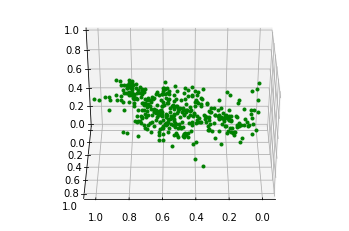

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')
ax.view_init(35,90)

In [38]:
x1=np.array(X1)
x2=np.array(X2)
y=np.array(Y)

In [39]:
x1_train.size

376

In [40]:
len(x1_test)

94

In [41]:
def hypothesis(a,x1,x2,b,c,d):
    return a * x1 + b*np.exp((-c*x2)) +d

In [42]:
def error(a,x1,x2,b,y,c,d):
    e=0
    m=len(y)
    for i in range(m):
        e+=np.power((hypothesis(a,x1[i],x2[i],b,c,d)-y[i]),2)
    return (1/(2*m)*e)

In [43]:
def step_gradient(a,x1,x2,b,y,learning_rate,c,d):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
   
   
    m=len(y)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*x1[i]
        grad_b += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*np.exp((-c*x2[i]))
        grad_c += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*(-b*x2[i]*np.exp((-c*x2[i])))
        grad_d += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])
     
       
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    d=d-(grad_d*learning_rate)
   
    
    
    return a,b,c,d

In [44]:
def descend(initial_a,initial_b,initial_c,initial_d,x1,x2,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
    d=initial_d
  
   
    for i in range(iterations):
        e=error(a,x1,x2,b,y,c,d)
        a,b,c,d=step_gradient(a,x1,x2,b,y,learning_rate,c,d)
        if i % 1000 == 0:
            print(f"Error: {e},a:{a},b:{b},c:{c},d:{d}")
    return a,b,c,d

In [45]:

init_a=1
init_b=1
init_c=1
init_d=1


iters=10000
learning_rate=0.01

In [46]:
final_a,final_b,final_c,final_d=descend(init_a,init_b,init_c,init_d,x1_train,x2_train,y_train,learning_rate,iters)

Error: 1.1997323594349847,a:0.9847890512563623,b:0.981734949023173,c:1.0089270978473233,d:0.9692932148165037
Error: 0.011640282015828392,a:0.7959858210741769,b:0.17874348193362607,c:1.1519086519615127,d:0.051825202472193924
Error: 0.010730924128809757,a:0.8518899998443984,b:0.06748766797231746,c:1.1447587480126533,d:0.08289488868876006
Error: 0.01048738203077732,a:0.8478256216973865,b:0.007879648344793266,c:1.1433238015865632,d:0.11716475128240718
Error: 0.010323935352683125,a:0.8292962357926171,b:-0.035063995484357756,c:1.1437392702813522,d:0.1498646633927595
Error: 0.010192103336972609,a:0.8084443956272487,b:-0.07100801195586903,c:1.1450886391344162,d:0.17994588973728642
Error: 0.010083757534340286,a:0.7884081037552584,b:-0.10279260185455878,c:1.1469785895140598,d:0.20732344226778301
Error: 0.009994598830655212,a:0.7699043923461452,b:-0.13138919533299215,c:1.1491550308169867,d:0.23215473982835516
Error: 0.009921278612104109,a:0.7530105269040754,b:-0.15724456536431908,c:1.151430107894

In [49]:
a=0.7376436183709034
b=-0.18064797236142144
c=1.1536628072543071
d=0.2750100660583756

error(a,x1_test,x2_test,b,y_test,c,d)

0.009204637688747238

In [50]:
final_a,final_b

(0.723701119320824, -0.20181237280138165)